In [1]:
    ## Data Storytelling project
    import pandas as pd
    import numpy as np
    import re

In [5]:

# The data from NYC Open Data public schools
data_files = ["ap_2010.csv", "class_size.csv", "demographics.csv", "graduation.csv", "hs_directory.csv", "math_test_results.csv", "sat_results.csv" ]
data = {}
# Reading each file into a Pandas DataFrame
# Putting each dataframe into a python dictionary
for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    data[f.replace(".csv","")] = d
    

In [6]:
# Read and verify if data is loaded

for k, v in data.items():
    print("\n" + k + "\n")
    print(v.head())
    


ap_2010

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  

class_size

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K

In [7]:
"""
The data is loaded properly. I can see some patterns. 
1) DBN looka like the primary key/unique identifier among all the columns
2) There are coordinates in the Location1 field
3) There are multiple rows for a given DBN
""" 
# DBN is unique code for each school.
data["demographics"]["DBN"].head()


0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object

In [8]:
data["class_size"].head()


,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [9]:
"""
DBN is a combination of CSD, Borough, School code
It stands for District Borough Number
CSD is district
The class_size dataset do not contain DBN. So we can create DBN column with the above logic
The demographic dataset calls DBN as dbn
So performing the below changes :
"""
data["class_size"]["DBN"] = data["class_size"].apply(lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

In [11]:
# Verifying..
print(data["class_size"]["DBN"].head())
print(data["hs_directory"]["DBN"].head())

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object
0    17K548
1    09X543
2    09X327
3    02M280
4    28Q680
Name: DBN, dtype: object


In [12]:
# Incorporating two surveys - for all schools and for district 75 schools
survey1 = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
survey2 = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey1["d75"] = False
survey2["d75"] = True
survey = pd.concat([survey1, survey2], axis=0)


In [13]:
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


In [15]:
# 2773 columns is really huge. Lets update survey to include only the columns we need
survey["DBN"] = survey["dbn"]
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_10", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11",]
survey = survey.loc[:,survey_fields]
data["survey"] = survey
survey.shape

(1702, 23)

In [17]:
# Checking classsize dataset
data["class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015


In [24]:
# This shows that there are multiple rows for a given DBN. 
# Given that our next step is evaluate with other datasets, we need to find a way to create only 1 row per DBN.
# So lets condense by 1) Selecting only 9th to 12th grade, program type as Gen Ed and grouping class_size as DBN 
# 2) and taking average of each column and 3) resetting index

class_size = data["class_size"]
print(class_size.head())
class_size = class_size[class_size["GRADE "]== "09-12" ]
class_size = class_size[class_size["PROGRAM TYPE"]== "GEN ED" ]
class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)
print(class_size.head())
data["class_size"] = class_size

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \


In [25]:
print(class_size.head())

      DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292    1                            88.0000            4.000000   
1  01M332    1                            46.0000            2.000000   
2  01M378    1                            33.0000            1.000000   
3  01M448    1                           105.6875            4.750000   
4  01M450    1                            57.6000            2.733333   

   AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
0           22.564286                   18.50              26.571429   
1           22.000000                   21.00              23.500000   
2           33.000000                   33.00              33.000000   
3           22.231250                   18.25              27.062500   
4           21.200000                   19.40              22.866667   

   SCHOOLWIDE PUPIL-TEACHER RATIO  
0                             NaN  
1                             NaN  
2                   

In [26]:
# Condensing demographics by including most recent years
demographics = data["demographics"]
demographics = demographics[demographics["schoolyear"]== 20112012]
data["demographics"] = demographics

In [27]:
# Condensing math_test_results dataset by segmenting the Grade and Year 
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Year"]==2011]
data["math_test_results"] = data["math_test_results"][data["math_test_results"]["Grade"] == '8']

In [28]:
# Condensing graduation by segmenting only 2006 cohort and Total Cohort Demographic
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"]=="Total Cohort"]


In [29]:
# Calculating new variables for analysis, converting string objects to numeric
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = data["sat_results"][c].convert_objects(convert_numeric=True)

data["sat_results"]["sat_score"] = data["sat_results"][cols[0]] + data["sat_results"][cols[1]] + data["sat_results"][cols[2]]
data["sat_results"].head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


In [32]:
#Parse longitudes and latitudes from Location 1 column
data["hs_directory"]['lat'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[0])
data["hs_directory"]['lon'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[1])

for c in ["lat", "lon"]:
    data["hs_directory"][c] = data["hs_directory"][c].convert_objects(convert_numeric=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [33]:
# Printing each item in the data set
for k,v in data.items():
    print(k)
    print(v.head())

ap_2010
      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
class_size
      DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292    1                            88.0000            4.000000   
1  01M332    1                            46.0000            2.000000   

In [36]:
# Using outer join to merge all datasets in the dataframe data
flat_data_names1 = [k for k,v in data.items()]
flat_data1 = [data[k] for k in flat_data_names1]
full1 = flat_data1[0]
for i, f in enumerate(flat_data1[1:]):
    name1 = flat_data_names1[i+1]
    print(name1)
    print(len(f["DBN"]) - len(f["DBN"].unique()))
    join_type = "inner"
    if name in ["sat_results", "ap_2010", "graduation"]:
        join_type = "outer"
    if name not in ["math_test_results"]:
        full1 = full1.merge(f, on="DBN", how=join_type)

full1.shape

class_size
0
demographics
0
graduation
0
hs_directory
0
math_test_results
0
sat_results
0
survey
0


(41, 180)

In [37]:
print(full.shape)


(471, 165)


In [38]:

flat_data_names = [k for k,v in data.items()]
flat_data = [data[k] for k in flat_data_names]
full_new = flat_data[0]
for i, f in enumerate(flat_data[1:]):
    name = flat_data_names[i+1]
    print(name)
    print(len(f["DBN"]) - len(f["DBN"].unique()))
    join_type = "inner"
    if name in ["sat_results", "ap_2010", "graduation"]:
        join_type = "outer"
    if name not in ["math_test_results"]:
        full_new = full_new.merge(f, on="DBN", how=join_type)

full_new.shape

class_size
0
demographics
0
graduation
0
hs_directory
0
math_test_results
0
sat_results
0
survey
0


(471, 165)

In [39]:
#Correlate placement exam results with SAT scores. To do this, convert these columns to numbers and fill missing values
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    full[col] = full[col].convert_objects(convert_numeric=True)

full[cols] = full[cols].fillna(value=0)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [40]:
# Calculate school district value form DBN
full["school_dist"] = full["DBN"].apply(lambda x: x[:2])


In [41]:
# Finally lets fill all missing values of full dataframe with the mean
full = full.fillna(full.mean())

In [42]:
full.corr()['sat_score']

AP Test Takers                          0.562897
Total Exams Taken                       0.551421
Number of Exams with scores 3 4 or 5    0.549217
CSD                                     0.043624
NUMBER OF STUDENTS / SEATS FILLED       0.321233
NUMBER OF SECTIONS                      0.296743
AVERAGE CLASS SIZE                      0.368949
SIZE OF SMALLEST CLASS                  0.275326
SIZE OF LARGEST CLASS                   0.291330
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
frl_percent                            -0.624215
total_enrollment                        0.291858
ell_num                                -0.111508
ell_percent                            -0.320149
sped_num                               -0.008183
sped_percent                           -0.452274
asian_num                               0.403802
asian_per                               0.541514
black_num                              -0.013158
black_per           

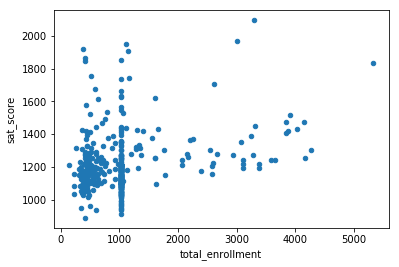

In [44]:
# Correlating number of students enrolled for the sat_score range

%matplotlib inline

full.plot.scatter(x='total_enrollment', y='sat_score')

In [45]:
# Big cluster above in the bottom left. Low total enrollment with low sat score. Lets see the names
full[(full["total_enrollment"] < 1000) & (full["sat_score"] < 1000)]["School Name"]

78                                       NaN
88     KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
90     INTERNATIONAL SCHOOL FOR LIBERAL ARTS
155                MULTICULTURAL HIGH SCHOOL
Name: School Name, dtype: object

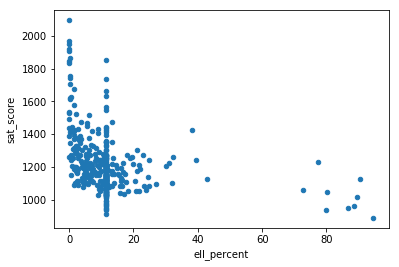

In [46]:
# Correlating English language learners and SAT scores

full.plot.scatter(x='ell_percent', y='sat_score')

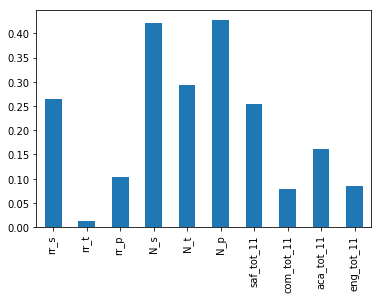

In [47]:
# Correlating survey scores and SAT scores
full.corr()["sat_score"][["rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_tot_11", "com_tot_11", "aca_tot_11", "eng_tot_11"]].plot.bar()

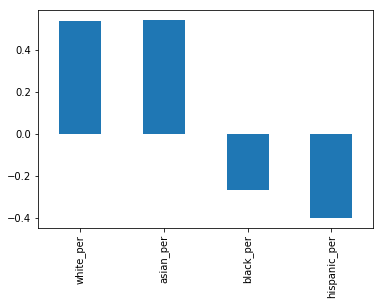

In [48]:
# Correlating race and SAT scores
full.corr()["sat_score"][["white_per", "asian_per", "black_per", "hispanic_per"]].plot.bar()


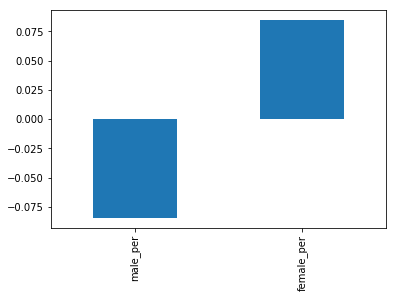

In [49]:
# Correlating gender and SAT scores
full.corr()["sat_score"][["male_per", "female_per"]].plot.bar()

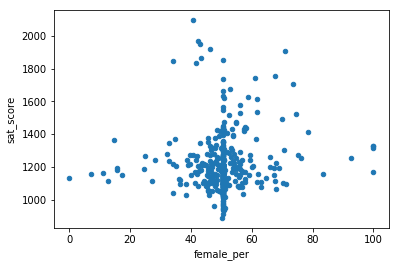

In [50]:
# Digging deeper for female percentage and SAT score
full.plot.scatter(x='female_per', y='sat_score')

In [51]:
# From the above, it looks like there is dense cluster of schools with a high percentage of females and high SAT scores
# Finding their names
full[(full["female_per"] > 65) & (full["sat_score"] > 1400)]["School Name"]

10            PROFESSIONAL PERFORMING ARTS HIGH SCH
14                    ELEANOR ROOSEVELT HIGH SCHOOL
22                     TALENT UNLIMITED HIGH SCHOOL
35             FIORELLO H. LAGUARDIA HIGH SCHOOL OF
185                     TOWNSEND HARRIS HIGH SCHOOL
212    FRANK SINATRA SCHOOL OF THE ARTS HIGH SCHOOL
Name: School Name, dtype: object

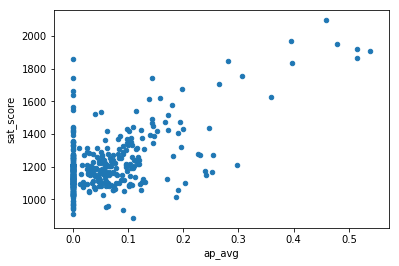

In [52]:
# Calculating placemnt average and correlating them with sat scores
full["ap_avg"] = full["AP Test Takers "] / full["total_enrollment"]

full.plot.scatter(x='ap_avg', y='sat_score')

In [53]:
# From the above, it looks like there is a cluster with high SAT scores and high proportion of students that take the AP exams in the top right
#Finding their names
full[(full["ap_avg"] > .3) & (full["sat_score"] > 1700)]["School Name"]

14             ELEANOR ROOSEVELT HIGH SCHOOL
20                    STUYVESANT HIGH SCHOOL
99              BRONX HIGH SCHOOL OF SCIENCE
103    HIGH SCHOOL OF AMERICAN STUDIES AT LE
122           BROOKLYN TECHNICAL HIGH SCHOOL
185              TOWNSEND HARRIS HIGH SCHOOL
202    QUEENS HIGH SCHOOL FOR THE SCIENCES A
223      STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: School Name, dtype: object